### Project Name: Exploratory Data Analysis (EDA) - Titanic dataset

### _Problem Statement:_

The sinking of the RMS Titanic on April 15, 1912, is one of the most infamous shipwrecks in history. Of the 2,224 passengers and crew aboard, more than 1,500 lost their lives. The disaster led to numerous studies and safety reforms in maritime travel.

The dataset contains demographic and travel-related details about Titanic passengers, along with their survival status.

The goal of this Exploratory Data Analysis (EDA) is to:

Understand the data structure and identify missing values, outliers, and anomalies.

Analyze survival patterns based on passenger attributes such as gender, age, class, fare, family size, and port of embarkation.

Identify key factors that contributed to survival likelihood.

Generate visual insights to reveal relationships between features and survival outcomes.

Provide data-driven recommendations that could be useful for predictive modeling or historical analysis.

#### _Understanding the Dataset:_

The Titanic dataset contains passenger information such as demographics, ticket class, fare, cabin, and survival status.

Common columns:

_Survived_ → Target variable (0 = No, 1 = Yes)

_Pclass_ → Passenger class (1 = Upper, 2 = Middle, 3 = Lower)

_Name, Sex, Age_

_SibSp_ → Number of siblings/spouses aboard

_Parch_ → Number of parents/children aboard

_Ticket, Fare, Cabin_

_Embarked_ → Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

#### Importing the libraries

In [243]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')


In [244]:
# Importing the dataset

DATA_DIR = Path('D:\Elevate_Labs\Tasks\Task-5')
titanic_data = pd.read_csv(DATA_DIR /'titanic.csv')

In [245]:
# Displaying the total rows and columns of the dataset

titanic_data.shape

(891, 12)

In [246]:
# Displaying first few rows of the dataset

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
# Displaying the last few rows of the dataset

titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [248]:
# Displaying the columns of the dataset

titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [249]:
# Displaying the summary statistics of the dataset

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [250]:
# Displaying the basic info of the dataset

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [251]:
# Check for unique values in each column

titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [252]:
# Check the distribution of categorical features

print(titanic_data['Pclass'].value_counts())
print(titanic_data['Sex'].value_counts())
print(titanic_data['SibSp'].value_counts())
print(titanic_data['Parch'].value_counts())
print(titanic_data['Embarked'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [253]:
# Check for duplicates

print('Print the number of duplicates:',titanic_data.duplicated().sum())

# if duplicates remove duplicates:
titanic_data = titanic_data.drop_duplicates()


Print the number of duplicates: 0


In [254]:
# Displaying the missing values in the dataset

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [255]:
# Displaying the percentage of missing values

missing_percentage = titanic_data.isnull().mean() * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

Calculated the percentage of missing values to determine whether the feature should e retained or not while chceking the percenrage value

* Cabin has 77.1% missing values
* Age has 19.86% missing values
* Embarked has 0.22% missing values

<Axes: >

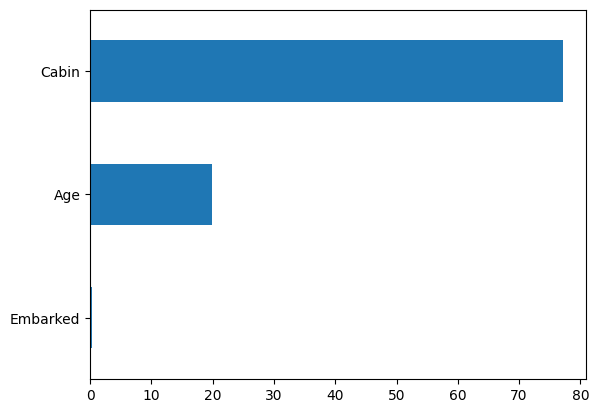

In [256]:
# Visualising the missing values 
# Missingness — show both counts and percentages + bar chart

missing_pct = titanic_data.isnull().mean()*100
missing_pct[missing_pct>0].sort_values(ascending=False)
missing_pct[missing_pct>0].sort_values().plot.barh()


In [257]:
# Handling the missing values

titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

* Fills missing Cabin values with 'Unknown'
* Median for Age avoids outlier bias
* Mode for Embarked replaces with most common port

In [258]:
# Title extraction
titanic_data['Title'] = titanic_data['Name'].str.extract(r',\s*([^\.]+)\.')

# Group rare titles together
common_titles = ['Mr', 'Mrs', 'Miss', 'Master']
titanic_data['Title'] = titanic_data['Title'].apply(lambda x: x if x in common_titles else 'Other')

# Age imputation by Title median
age_medians = titanic_data.groupby('Title')['Age'].median()
titanic_data['Age'] = titanic_data.apply(lambda row: age_medians[row['Title']] if pd.isnull(row['Age']) else row['Age'], axis=1)


In [259]:
# FamilySize and IsAlone
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)


In [260]:
# Deck from Cabin and HasCabin

titanic_data['Deck'] = titanic_data['Cabin'].astype(str).str[0]
titanic_data['HasCabin'] = titanic_data['Cabin'].notnull().astype(int)
# If Cabin entries are "nan" strings after conversion above, you can set Deck to NaN for 'n' or adjust.


In [261]:
# Checking for missing values after imputation

titanic_data.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
Deck           0
HasCabin       0
dtype: int64

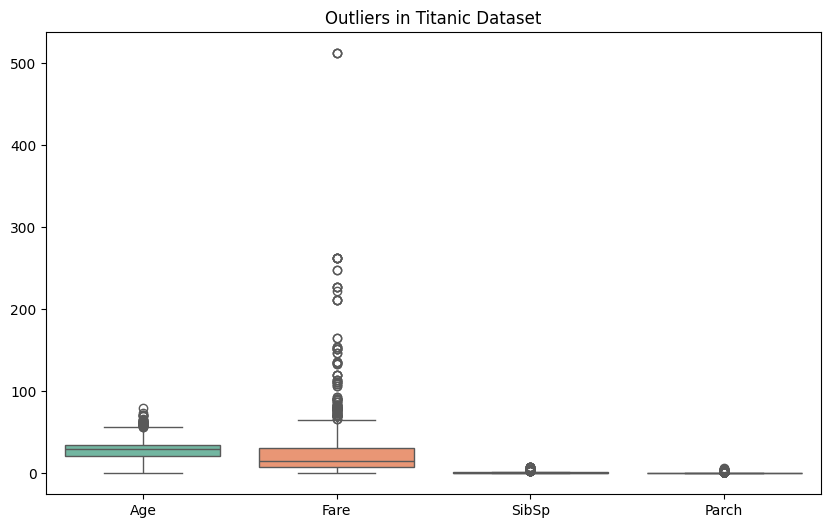

In [262]:
# Detect Outliers (IQR Method)

# Select numeric columns for outlier detection
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

outliers = {}

for col in num_cols:
    Q1 = titanic_data[col].quantile(0.25)
    Q3 = titanic_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_values = titanic_data[(titanic_data[col] < lower_bound) | (titanic_data[col] > upper_bound)][col]
    outliers[col] = outlier_values

outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=titanic_data[num_cols], palette="Set2")
plt.title("Outliers in Titanic Dataset")
plt.show()


In [263]:
# Remove Outliers (IQR Method)

# Function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Numeric columns to check
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Remove outliers for each numeric column
for col in num_cols:
    titanic_data = remove_outliers(titanic_data, col)

# Reset index after removal
titanic_data.reset_index(drop=True, inplace=True)

print("Dataset shape after outlier removal:", titanic_data.shape)



Dataset shape after outlier removal: (583, 17)


## Data Visualization

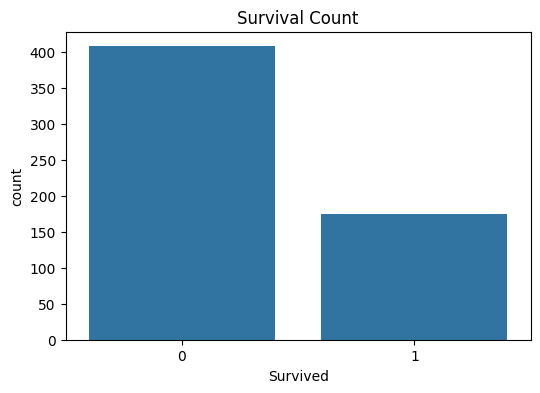

In [264]:
# Survival Count

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.show()

* Survivors tend to have with it's count.

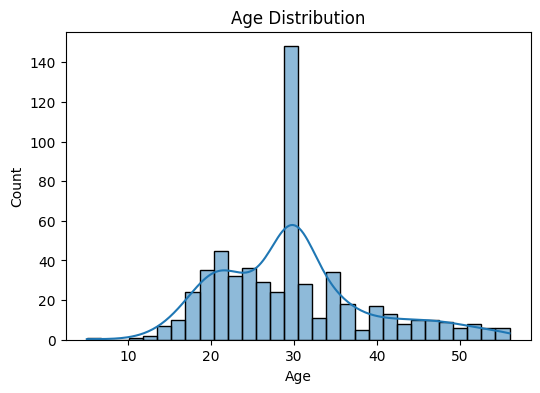

In [265]:
plt.figure(figsize=(6,4))
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Most passengers were between 20–40 years old.

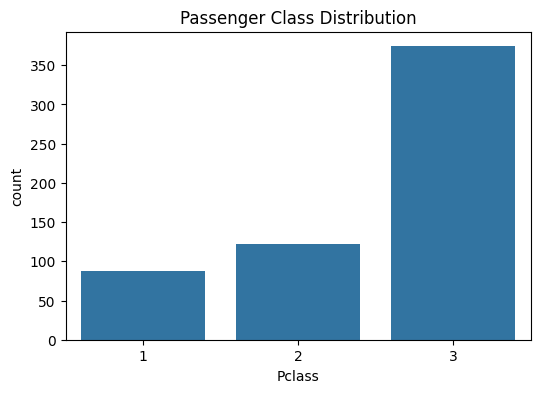

In [266]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=titanic_data)
plt.title('Passenger Class Distribution')
plt.show()

Majority were in 3rd class.

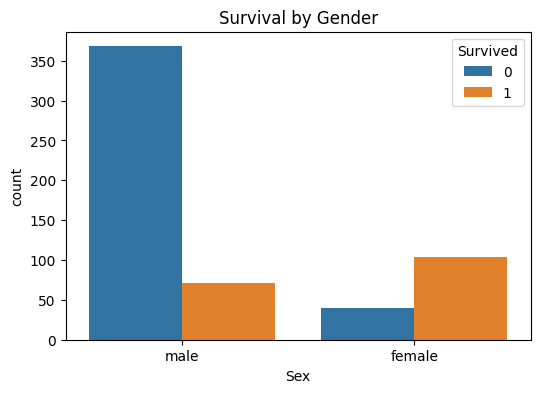

In [267]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival by Gender')
plt.show()

Higher survival rate for females.

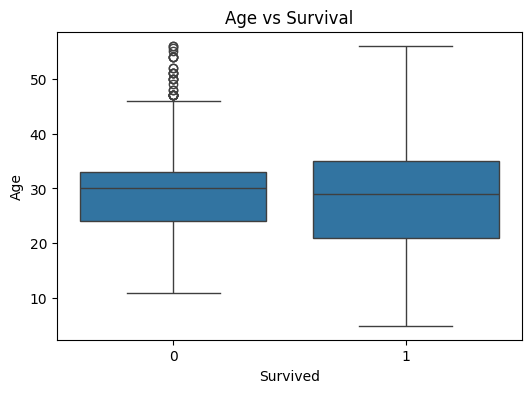

In [268]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age vs Survival')
plt.show()

Younger passengers had slightly better survival rates.

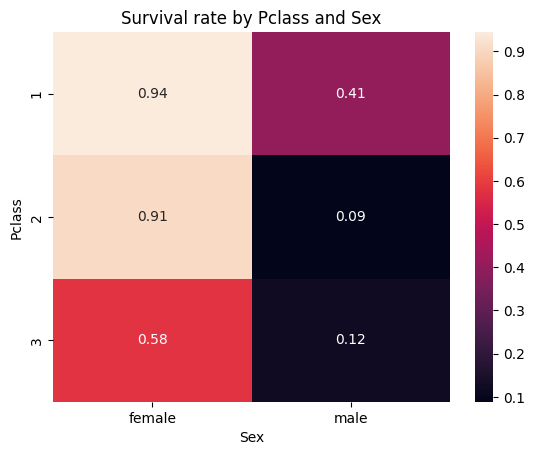

In [269]:
# Survival rates pivot + heatmap

pv = titanic_data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pv, annot=True, fmt=".2f")
plt.title("Survival rate by Pclass and Sex")
plt.show()

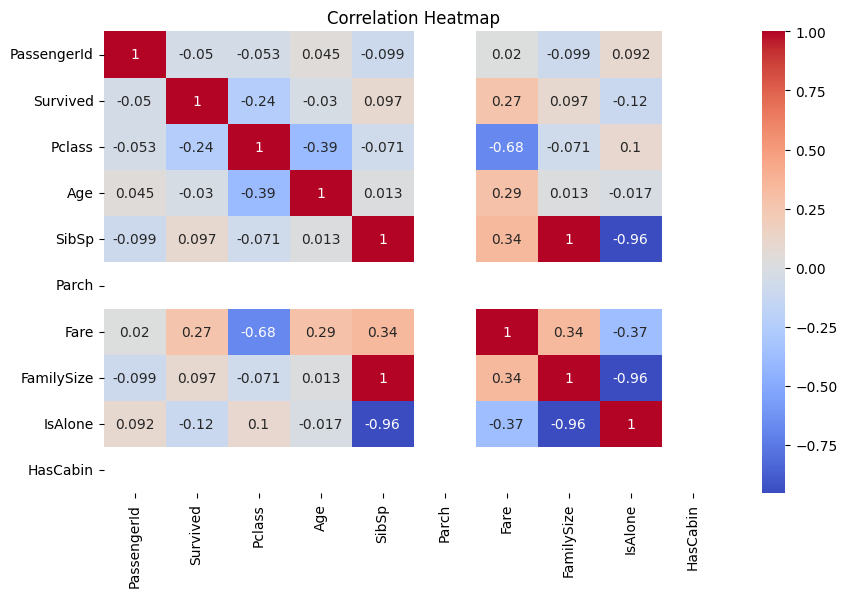

In [270]:
# Correlation Analysis

# Select only numeric columns for correlation
numeric_data = titanic_data.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


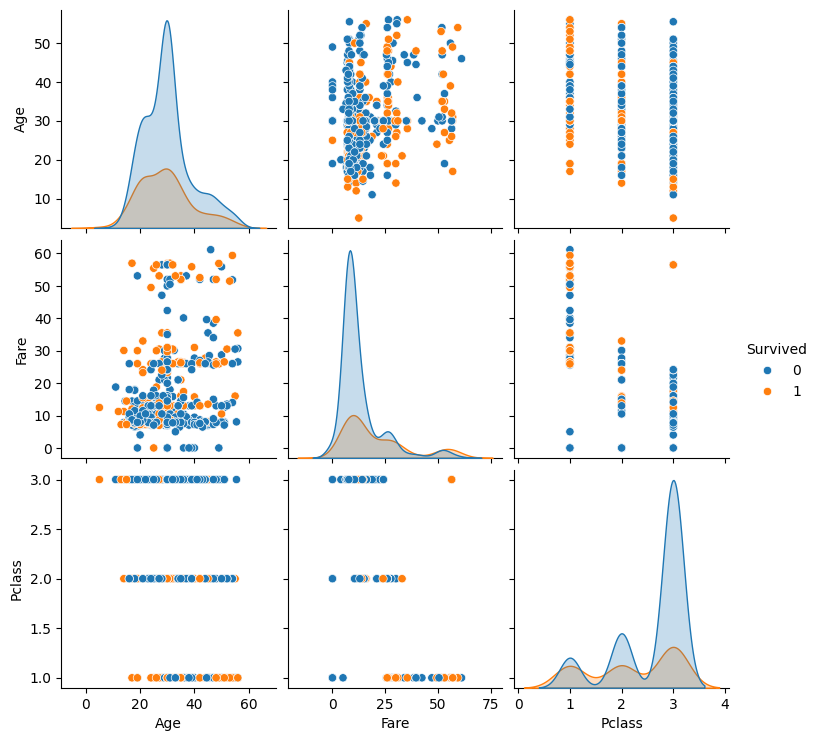

In [271]:
sns.pairplot(titanic_data[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


## Summary of Findings

1. Females had a much higher survival rate than males.

2. First-class passengers had the highest survival rate; third-class the lowest.

3. Younger passengers and children had a better chance of survival.

4. Higher ticket fares were associated with higher survival probability.

5. Cabin information was missing for most passengers; those with cabin data were mostly survivors from higher classes.